In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# 讀取 CSV 檔案
file_name = 'ML95S_SIN_2MHz-20_Norm.'
file_path = f'./Data/{file_name}.csv'
data = pd.read_csv(file_path)

# 確認資料格式
t = data['t']
B = data['B']
H = data['H']
# H_pred = data['H_pred128'].dropna()
# H_meas = data['H_meas128'].dropna()

# 確認數據形狀
print(f"Shape of t: {t.shape}")
print(f"Shape of B: {B.shape}")
print(f"Shape of H: {H.shape}")
# print(f"Shape of H_pred: {H_pred.shape}")
# print(f"Shape of H_meas: {H_meas.shape}")

#參數
freq = 3000e-3
Ve = 512.65e-9


Shape of t: (8192,)
Shape of B: (8192,)
Shape of H: (8192,)


Pcv: 6146.306625kW/m^3


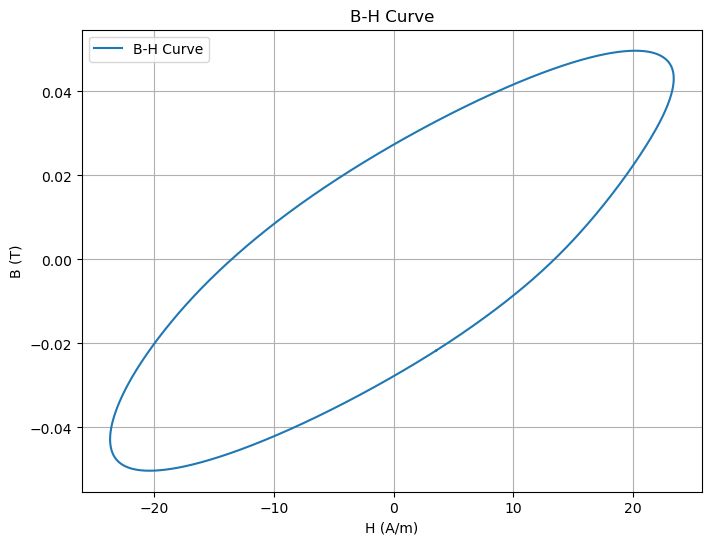

In [44]:
# 使用 trapz 計算面積
area = np.trapz(H, B)
Pcv = freq * np.trapz(H, B) * 1000
print(f"Pcv: {abs(Pcv):.6f}kW/m^3")

# 繪製 BH 曲線
plt.figure(figsize=(8, 6))
plt.plot(H, B, label='B-H Curve')
plt.title("B-H Curve")
plt.xlabel("H (A/m)")
plt.ylabel("B (T)")
plt.grid(True)
plt.legend()
plt.show()


In [45]:
# # 降階 128step 計算出的BH面積

# # 採樣後數據（從 get_dataloader 中提取）
# seq_length = 512
# cols = range(0, 8192, int(8192 / seq_length))  # 下採樣到 128 點

# # # 改成這樣（針對每一筆 B）
# # downsampled_B = []
# # downsampled_H = []

# B_array = B.values  # or np.array(B)
# H_array = H.values

# # cols = peak_aware_downsample(B_array, total_points=128, peak_ratio=0.5)

# # cols = np.sort(cols)
# B_downsampled = B_array[cols]
# H_downsampled = H_array[cols]

# # area_downsampled = np.abs(np.trapz(H_downsampled, B_downsampled))

# # 採樣後的 B-H 面積和 Pcv 計算
# # 確保採樣後數據形成閉合迴圈
# B_downsampled_closed = np.append(B_downsampled, B_downsampled[0])
# H_downsampled_closed = np.append(H_downsampled, H_downsampled[0])

# # 使用 trapz 計算面積（單位：J/m³）
# area_downsampled = np.abs(np.trapz(H_downsampled_closed, B_downsampled_closed))

# # 計算 Pcv (單位：kW/m³)
# Pcv_downsampled = freq * area_downsampled * 1000  # freq (kHz) * area (J/m³) * 1000 = kW/m³

# # print(f"採樣後 B-H 曲線的面積: {area_downsampled:.6f} J/m³")
# print(f"採樣後 Pcv: {abs(Pcv_downsampled):.6f} kW/m³")

# # 比較採樣前後的面積和 Pcv
# area_diff = area - area_downsampled
# area_relative_error = np.abs(area_diff) / area * 100
# Pcv_diff = Pcv - Pcv_downsampled
# Pcv_relative_error = np.abs(Pcv_diff) / Pcv * 100

# # print(f"\n面積差異: {area_diff:.6f} J/m³")
# # print(f"面積相對誤差: {area_relative_error:.2f}%")
# print(f"Pcv 差異: {Pcv_diff:.6f} kW/m³")
# print(f"Pcv 相對誤差: {Pcv_relative_error:.2f}%")

# # 繪製採樣後的 B-H 曲線，並與採樣前比較
# plt.figure(figsize=(8, 6))
# plt.plot(H, B, label='Original (8192 points)', linestyle='-', alpha=0.7)
# plt.plot(H_downsampled,
#          B_downsampled,
#          label='Downsampled (128 points)',
#          linestyle='--',
#          marker='o',
#          markersize=1)
# plt.title("B-H Curve Comparison (Original vs Downsampled)")
# plt.xlabel("H (A/m)")
# plt.ylabel("B (T)")
# plt.grid(True)
# plt.legend()
# plt.show()

In [46]:
# def peak_aware_downsample(B_array, total_points=128, peak_ratio=0.3):
#     """
#     根據 B 波形正負峰值採樣密集區，其餘均勻取樣
#     - B_array: shape=(8192,) 的 B 資料
#     - total_points: 要保留的總點數（例如 128）
#     - peak_ratio: 有多少比例點數保留給 B 高峰區段
#     """
#     assert len(B_array) >= 8192, "B 資料長度不足"

#     peak_points = int(total_points * peak_ratio)
#     edge_points = total_points - peak_points

#     # 找出 B 的正負最大區段（峰值 ± buffer 區）
#     idx_max = np.argmax(B_array)
#     idx_min = np.argmin(B_array)

#     # 避免極端集中：對 max/min 附近 ±Δ點取樣
#     peak_width = 100  # 峰值附近取樣範圍（可調整）
#     peak_indices = np.concatenate([
#         np.linspace(max(0, idx_min - peak_width), min(8191, idx_min + peak_width), peak_points // 2, dtype=int),
#         np.linspace(max(0, idx_max - peak_width), min(8191, idx_max + peak_width), peak_points // 2, dtype=int),
#     ])

#     # 其他部分均勻分布取樣
#     exclude = set(peak_indices)
#     linear_indices = np.linspace(0, 8191, edge_points * 2)  # 乘 2 是因為後面會篩掉重複
#     linear_indices = [int(i) for i in linear_indices if int(i) not in exclude]
#     linear_indices = np.array(linear_indices[:edge_points])

#     indices = np.sort(np.unique(np.concatenate([peak_indices, linear_indices])))
#     return indices
